#### Provide an example of invasion percolation

In [1]:
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
import random
np.random.seed(0)
im = np.load('1.npy')

snow = ps.networks.snow2(
    phases=im,
    phase_alias={True:"void",False:"solid"},
    voxel_size=2.32e-06)

ws = op.Workspace()
pn = op.io.network_from_porespy(snow.network)
pn.add_model_collection(op.models.collections.geometry.spheres_and_cylinders)
pn.regenerate_models()
proj = pn.project

boundary_ps_num = 15
idx_min = pn['pore.coords'][:,0].argsort()[:boundary_ps_num]
idx_max = pn['pore.coords'][:,0].argsort()[-boundary_ps_num:]
pn.set_label(label='left',pores=idx_min)
pn.set_label(label='right',pores=idx_max)

# %% Invasion Percolation
air = op.phase.Air(network=pn,name='air')
air['pore.surface_tension'] = 0.072
air['pore.contact_angle'] = 180.0
air.add_model_collection(op.models.collections.phase.air)
air.add_model_collection(op.models.collections.physics.basic)
air.regenerate_models()
water = op.phase.Water(network=pn,name='water')
water.add_model_collection(op.models.collections.phase.water)
water.add_model_collection(op.models.collections.physics.basic)
water.regenerate_models()



0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Extracting pore and throat properties:   0%|          | 0/764 [00:00<?, ?it/s]

#### Invasion percolation without trapping

Text(0, 0.5, 'Non-Wetting Phase Saturation')

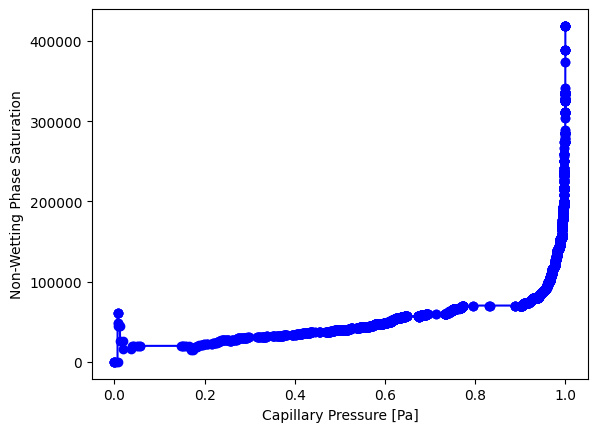

In [2]:
ip = op.algorithms.InvasionPercolation(network=pn, phase=air)
Finlets_init = pn.pores('left')
Finlets=([Finlets_init[x] for x in range(0, len(Finlets_init), 2)])
ip.set_inlet_BC(pores=Finlets)
ip.run()

# plot the intrusion curve
data = ip.pc_curve()
f = plt.figure()
plt.plot(data.snwp, data.pc, 'b-o')
plt.xlabel('Capillary Pressure [Pa]')
plt.ylabel('Non-Wetting Phase Saturation')

#### Invasion percolation with trapping

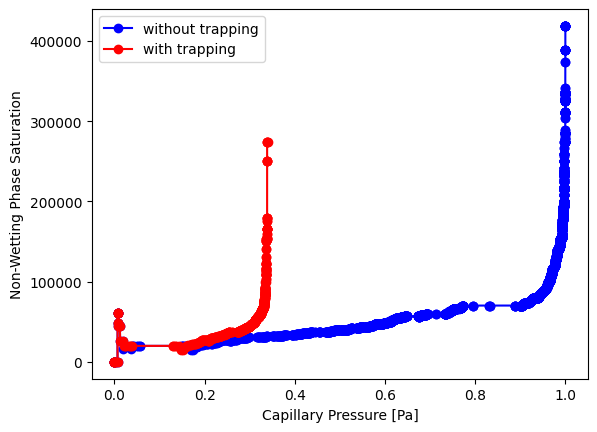

In [3]:
#%% plot the intrusion curve with trapping
ip.set_outlet_BC(pores=pn.pores('right'),mode='overwrite')
ip.apply_trapping()
data2 = ip.pc_curve()
f = plt.figure()
plt.plot(data.snwp, data.pc, 'b-o',label='without trapping')
plt.plot(data2.snwp, data2.pc, 'r-o',label='with trapping')
plt.xlabel('Capillary Pressure [Pa]')
plt.ylabel('Non-Wetting Phase Saturation')
plt.legend()